In [1]:
import mplfinance as mpf
import pandas as pd
import logging
import plotly.graph_objects as go
from datetime import datetime
import os
from XTBClient.api import XTBClient, YahooClient, PERIOD
import plotly.graph_objects as go
import yfinance as yf
import os
import sys
import importlib.util

# Get the path to the XTBClient directory
xtbclient_path = os.path.join(os.getcwd(), 'XTBClient')

# Add the XTBClient directory to sys.path
sys.path.append(xtbclient_path)

# Import the XTBClient.api module
import XTBClient.api as xtb_api

# Reload the XTBClient.api module
importlib.reload(xtb_api)

<module 'XTBClient.api' from '/home/krystian/Repos/XTB-Trader/XTBClient/api.py'>

In [2]:
yc = YahooClient()
yc.get_candles_for_period(datetime(2022,3,1), datetime(2022,9,1)).head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,1.121466,1.123217,1.110211,1.121592,1.121592,0
2022-03-02,1.113102,1.114194,1.105852,1.113276,1.113276,0
2022-03-03,1.111358,1.111605,1.103984,1.111235,1.111235,0
2022-03-04,1.106929,1.106929,1.089004,1.106684,1.106684,0
2022-03-07,1.087394,1.093075,1.080859,1.087453,1.087453,0


In [3]:
logging.disable(logging.CRITICAL)

In [4]:
c = XTBClient()

In [5]:
c.login(os.environ.get("XTB_login"), os.envorion.get("XTB_pass"))

In [6]:
symbol_response = c.get_all_symbols()

In [7]:
symbols_dict = [
    {
        "name": s['symbol'],
        "displayName": s['description'],
        "type": s['type'] 
    } for s in symbol_response]


In [8]:
symbols_dict

[{'name': 'TGNA.US_9', 'displayName': 'TEGNA Inc', 'type': 2436},
 {'name': 'FUTU.US_9', 'displayName': 'Futu Holdings Ltd - ADR', 'type': 2436},
 {'name': 'SIRI.US_9', 'displayName': 'Sirius XM Holdings Inc', 'type': 2436},
 {'name': 'BMRN.US_9',
  'displayName': 'BioMarin Pharmaceutical Inc',
  'type': 2436},
 {'name': 'HALO.US_4',
  'displayName': 'Halozyme Therapeutics Inc CFD',
  'type': 13},
 {'name': 'GEO.US_9', 'displayName': 'GEO Group Inc/The', 'type': 2436},
 {'name': 'DEA.US_4',
  'displayName': 'Easterly Government Properties Inc CFD',
  'type': 13},
 {'name': 'IG.IT_4', 'displayName': 'Italgas SpA CFD', 'type': 16},
 {'name': 'TM.US_4', 'displayName': 'Toyota Motor Corp - ADR CFD', 'type': 13},
 {'name': 'SKFB.SE_9', 'displayName': 'SKF AB', 'type': 2432},
 {'name': 'NXT.UK_4', 'displayName': 'Next PLC CFD', 'type': 14},
 {'name': 'WCC.US_4',
  'displayName': 'Wesco International Inc CFD',
  'type': 13},
 {'name': 'EXPD.US_4',
  'displayName': 'Expeditors International of

In [10]:
symbol_response[0]

{'symbol': 'TGNA.US_9',
 'currency': 'USD',
 'categoryName': 'STC',
 'currencyProfit': 'USD',
 'quoteId': 6,
 'quoteIdCross': 15,
 'marginMode': 104,
 'profitMode': 6,
 'pipsPrecision': 2,
 'contractSize': 1,
 'exemode': 1,
 'time': 1685649564331,
 'expiration': None,
 'stopsLevel': 0,
 'precision': 2,
 'swapType': 2,
 'stepRuleId': 12,
 'type': 2436,
 'instantMaxVolume': 2147483647,
 'groupName': 'US',
 'description': 'TEGNA Inc',
 'longOnly': True,
 'trailingEnabled': False,
 'marginHedgedStrong': False,
 'swapEnable': True,
 'percentage': 100.0,
 'bid': 15.81,
 'ask': 15.83,
 'high': 15.84,
 'low': 15.3,
 'lotMin': 1.0,
 'lotMax': 1000000.0,
 'lotStep': 1.0,
 'tickSize': 0.01,
 'tickValue': 0.01,
 'swapLong': 0.0,
 'swapShort': 0.0,
 'leverage': 100.0,
 'spreadRaw': 0.02,
 'spreadTable': 2.0,
 'starting': None,
 'swap_rollover3days': 0,
 'marginMaintenance': 0,
 'marginHedged': 0,
 'initialMargin': 0,
 'timeString': 'Thu Jun 01 21:59:24 CEST 2023',
 'shortSelling': False,
 'currency

In [9]:
c.check_if_market_open(["EURUSD"])

{'EURUSD': True}

In [7]:
data = c.getChartRangeRequest(PERIOD.FIVE_MINUTES.value, datetime(2023,3,24))

In [8]:
len(data)

6762

In [9]:
df = pd.DataFrame(data)
# Convert the timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Set the timestamp as the index of the dataframe
df.set_index('timestamp', inplace=True)

df.head()

,open,close,high,low,volume
timestamp,,,,,
2023-03-28 22:00:00,1.08407,1.08433,1.08442,1.08405,611.0
2023-03-28 22:05:00,1.08434,1.08437,1.08439,1.08431,256.0
2023-03-28 22:10:00,1.08438,1.08437,1.08439,1.08432,611.0
2023-03-28 22:15:00,1.08438,1.08435,1.08439,1.08433,490.0
2023-03-28 22:20:00,1.08433,1.08441,1.08441,1.08433,319.0


In [10]:
print(f"from {df.iloc[0]} to \n{df.iloc[-1]}")

from open        1.08407
close       1.08433
high        1.08442
low         1.08405
volume    611.00000
Name: 2023-03-28 22:00:00, dtype: float64 to 
open         1.09848
close        1.09837
high         1.09865
low          1.09830
volume    2965.00000
Name: 2023-05-01 14:30:00, dtype: float64


In [11]:
df.to_pickle("instruments.pkl")

In [3]:
new_table = pd.read_pickle("instruments.pkl")

In [4]:
new_table.head()

,open,close,high,low,volume
timestamp,,,,,
2023-03-28 22:00:00,1.08407,1.08433,1.08442,1.08405,611.0
2023-03-28 22:05:00,1.08434,1.08437,1.08439,1.08431,256.0
2023-03-28 22:10:00,1.08438,1.08437,1.08439,1.08432,611.0
2023-03-28 22:15:00,1.08438,1.08435,1.08439,1.08433,490.0
2023-03-28 22:20:00,1.08433,1.08441,1.08441,1.08433,319.0


In [65]:
def plot(df):
    fig = go.Figure()

    fig.add_trace(go.Candlestick(
        x=df.index, open=df.open, close=df.close, high=df.high, low=df.low,
        line=dict(width=1), opacity=1,
        increasing_fillcolor='#24A06B',
        decreasing_fillcolor="#CC2E3C",
        increasing_line_color='#2EC886',  
        decreasing_line_color='#FF3A4C'
    ))
    fig.update_layout(width=1000,height=600,
        margin=dict(l=10,r=10,b=10,t=10),
        font=dict(size=10,color="#e1e1e1"),
        paper_bgcolor="#1e1e1e",
        plot_bgcolor="#1e1e1e")
    fig.update_xaxes(
        gridcolor="#fff",
        showgrid=True,fixedrange=True,rangeslider=dict(visible=False)
    )
    fig.update_yaxes(
        gridcolor="#1f292f",
        showgrid=True
    )
    fig.show()

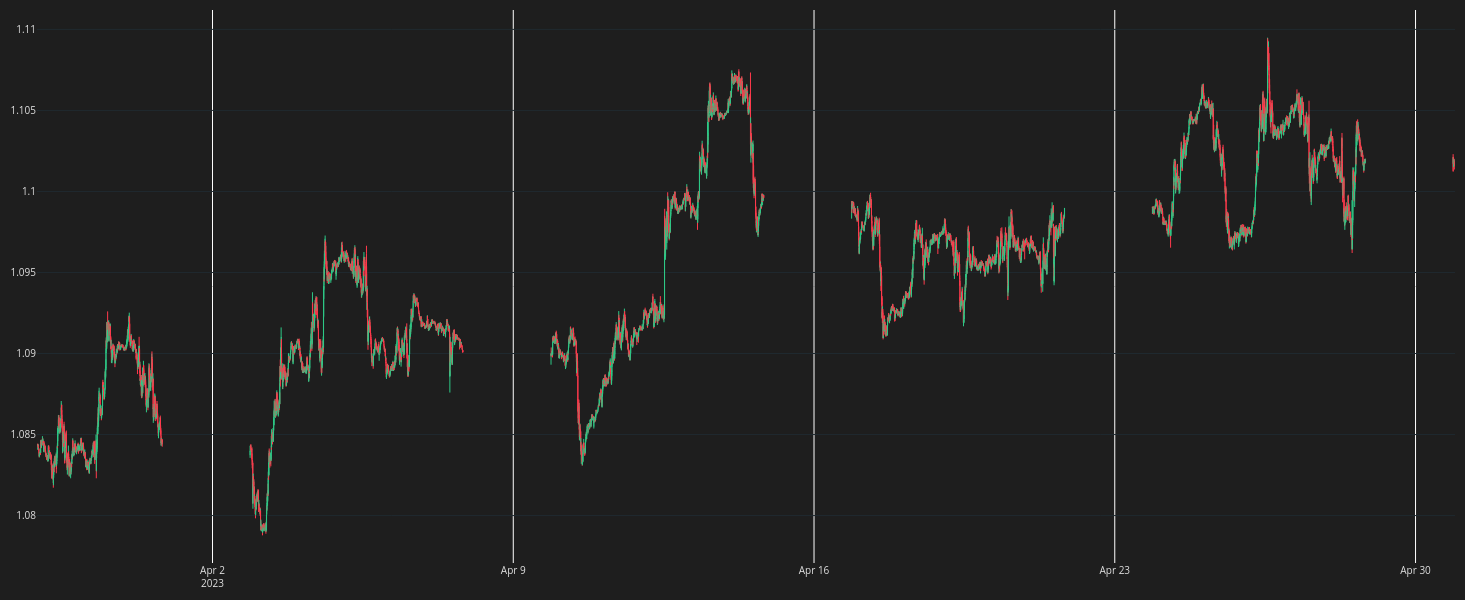

In [66]:
plot(df)